In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 95% !important; }</style>"))

In [2]:
# testing code
import sys
sys.path.append("..")

In [3]:
import atlas_rbm.atlas as atlas
import atlas_rbm.export as export
import atlas_rbm.simulation as simulation

import seaborn
import matplotlib.pyplot as plt

In [4]:
data = atlas.read_network('../lactose/networks/metabolism_v2.txt')

In [5]:
model = atlas.construct_model_from_metabolic_network('../lactose/networks/metabolism_v2.txt')

In [6]:
# model initial condition
simulation.set_initial(model, 'beta_lactose', 'per', 100)
simulation.set_initial(model, 'PROTON', 'per', 100)
simulation.set_initial(model, 'WATER', 'cyt', 100)

simulation.set_initial(model, 'BETAGALACTOSID_CPLX', 'cyt', 1)
simulation.set_initial(model, 'GALACTOACETYLTRAN_CPLX', 'cyt', 1)
simulation.set_initial(model, 'LACY_MONOMER', 'cyt', 1)

<Model 'atlas_rbm.atlas' (monomers: 3, rules: 18, parameters: 105, expressions: 0, compartments: 0) at 0x7f422aa12b38>

In [7]:
bng = '/opt/git-repositories/bionetgen.RuleWorld/bng2/'
export.to_bngl(model, 'test.bngl', bng)
export.to_kappa(model, 'test.kappa')

In [17]:
data1 = simulation.ode(model, path = bng)
data2 = simulation.ssa(model, start = 0, finish = 5, points = 500, n_runs = 20, path = bng)

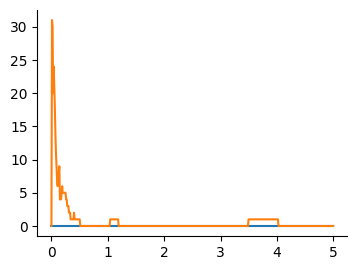

In [16]:
fig, ax = plt.subplots(1, 1, figsize = (4*1, 3*1), dpi = 100)
simulation.plot(data2.xs(0), 'alpha_lactose', 'cyt')
simulation.plot(data2.xs(0), 'beta_lactose', 'cyt')

seaborn.despine()